# Primeira entrega

Planejamento da Solução
 - Ler o artigo para pensar na saolução

Coleta de dados
 - Buscar uma forma de conectar com o banco de dados da AWS

# 0.0 Imports

In [1]:
import pickle

import numpy    as np
import pandas   as pd
import seaborn  as sns

from scipy              import stats
from IPython.display    import Image

## 0.1 Help Functions

In [2]:
# Supressão de Notação Científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.3f}'.format)

In [3]:
# Corrigir Gráficos Jupter

from matplotlib import pyplot as plt
from IPython.core.display import HTML

def jupyter_settings():
    %matplotlib inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
#    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

jupyter_settings()

In [4]:
def cramer_v(x, y):
    cm = pd.crosstab( x, y ).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1) * (r-1) / (n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt( ( chi2corr/n ) / ( min( kcorr-1,rcorr-1 ) ) )

## 0.2 Load interim data

In [5]:
df2 = pickle.load(open('../data/interim/df1_descricao.pkl', 'rb'))
df2.head()

,id,genero,idade,codigo_regiao,contato_cliente,cnh,idade_veiculo,veiculo_danificado,seguro_previo_automovel,premio_anual,cliente_dias_contrato,resposta
0,1,Male,44,28.000,26.000,1,> 2 Years,Yes,0,40454.000,217,1
1,2,Male,76,3.000,26.000,1,1-2 Year,No,0,33536.000,183,0
2,3,Male,47,28.000,26.000,1,> 2 Years,Yes,0,38294.000,27,1
3,4,Male,21,11.000,152.000,1,< 1 Year,No,1,28619.000,203,0
4,5,Female,29,41.000,152.000,1,< 1 Year,No,1,27496.000,39,0


# 1.0 Hipoteses 
Iniciada no __2º Cíclo CRISP__

## 1.1 Mind map

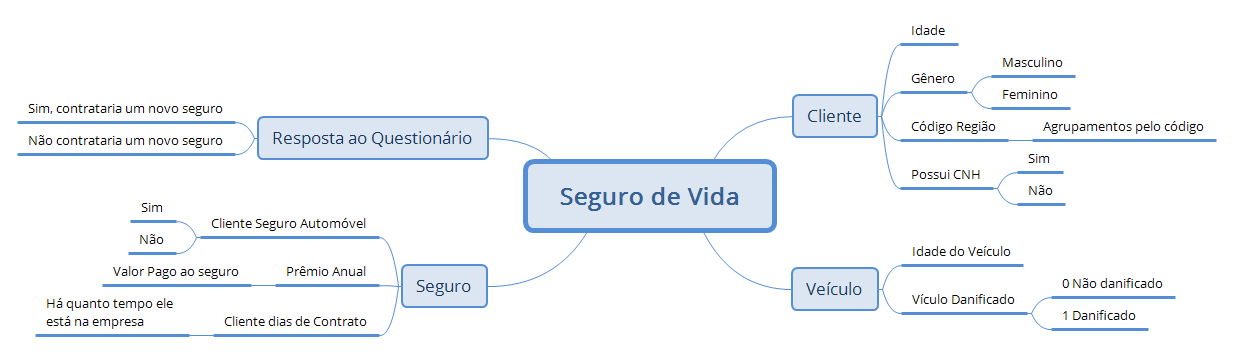

In [6]:
Image('../reports/figures/Seguro de Vida.png')

## 1.2 Criação das Hipóteses

### 1.2.1 Cliente

__2º Cíclo CRISP__

1. Clientes entre 35 e 65 anos responderam em média mais 'sim' no questionário.

2. Clientes do gênero masculinos tem uma maior probabilidade de responder 'não' no questionário.

3. Clientes de da mesma região não divergiram a resposta em mais de 20% (Pareto).

4. Clientes que não possuem CNH responderam em média mais 'sim' no questionário.

### 1.2.2 Veículo

__2º Cíclo CRISP__

1. Clientes com veículos Não danificados responderam em média mais 'não' no questionário.

2. Clientes com veículos acima de 2 anos de idade responderam em média mais 'não' no questionário.

3. Clientes com veículos até 1 ano de idade e com seguro automotivo e responderam em média mais 'sim' no questionário.

### 1.2.3 Seguro

__2º Cíclo CRISP__

1. Clientes que já possuem seguro automotívo resmponderam em média mais 'sim' no questionário.

2. Clientes com até 90 dias de seguro responderam em média mais 'não' no questionário.

3. 30% Clientes dos prêmios mais baixos responderam em média mais 'não' no questionário.

# 2.0 Feature Engenniring

## 1.1 Fetures necessárias

__Features Reestruturadas__ 1º Ciclo CRISP

1. idade_veiculo - transformar de str para int (1, 2, 3)

2. veiculo_danificado - transformar de str para int (0, 1)

__Features Derivadas__ 2º Ciclo CRISP

1. Idade - Jovem (x = min, x <= 35), Adulto (x > 35 - x <= 65), Idoso (x > 65).

2. Idade Veículo - Pouca Manutenção (x = min, x <= 1), Médio Manutenção (x > 1 - x <= 2), Muita Manutenção (x > 2).

3. Cliente dias Contrato - semana 7 dias completos; mês 30 dias completos.

In [7]:
df2['idade_veiculo'] = df2['idade_veiculo'].apply(lambda x: 1 if x == '< 1 Year' else
                                                            2 if x == '1-2 Year' else 3)

df2['veiculo_danificado'] = df2['veiculo_danificado'].apply(lambda x: 1 if x == 'Yes' else 0)

# 3.0 Filter Data

Sem filtro __1º Ciclo CRISP__

# 4.0 Export Pickle interim Data

In [ ]:
pickle.dump(df2,open('../data/interim/df2_feature.pkl','wb'))

In [ ]:
del df2